<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2018 Practicum 
***

This practicum is due on Moodle by **11:55pm on Wednesday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Solutions

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3)

---

In [2]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/tony/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<br>

---
[Back to top](#top)
<a id='p1'></a>

### [35 points] Problem 1: Yahtzee!

**Part A:** You are playing [Yahtzee](https://en.wikipedia.org/wiki/Yahtzee) with your friends. A player's turn in Yahtzee consists of rolling a set of 5 dice. Then the player is given two additional rolls, where they are allowed to re-roll any number of the dice, including potentially all of them or none of them. The goal is to obtain certain combinations of the dice values resulting after the third roll. Different combinations are worth different amounts of points, and the goal of the game is to get as many points as possible.

This game of Yahtzee is a bit unlike any you have ever played before, however. This is because Darth Ketelsen is back, and with her she brought her famous **5-sided dice**. These are fair dice with sides numbered 1-5. So, you are playing Yahtzee with a Sith Lord with 5-sided dice. Indeed, things just got real.

A **straight** in Darth Ketelsen's game consists of 5 values all in a row. For example, the outcome $[1,2,3,4,5]$ is a  straight but the outcome $[1,2,3,4,4]$ is not.

**Do two things:**
1. Compute by hand the probability of rolling a straight in a single roll of all 5 dice. Show all work.
2. Write a simulation to verify the probability that you computed. Run at least 10,000 simulations. 

**Solution:**

Note that with five five-sided dice, a straight is equivalent to rolling all unique outcomes. Thus, the probability of rolling a straight is $\dfrac{\text{number of outcomes with all unique values}}{\text{number of outcomes total}}$

The total number of outcomes is $5^5$.

The number of outcomes with all unique values is $5 \times 4 \times 3 \times 2 \times 1 = 5!$ because there are 5 options for the first die, then only 4 options for the second die (because we cannot repeat the outcome of the first die), then only 3 options for the third die, and so on.

So we have $p(S) = \dfrac{5!}{5^5} = \fbox{$0.0384$}$

In [70]:
5*4*3*2*1/(5**5)

0.0384

In [69]:
die = np.array([1,2,3,4,5])

def straight(ntrial=10000):
    cnt = 0
    for _ in range(ntrial):
        rolls = np.random.choice(die, replace=True, size=5)
        if len(np.unique(rolls))==5:
            cnt += 1
    return cnt/ntrial

print(straight(100000))

0.03886


**Part B:** The goal of this problem is to compute the probability of getting a straight using all three of your rolls, instead of just the single roll approach that you computed in Part A. Here, we'll need to implement a strategy so that after the first roll and after the second roll, we keep the dice that get us closer to a straight and re-roll the dice that are not useful for our straight.

For instance, suppose your first roll comes up $[1,2,3,3,3]$. You really want to get that straight! So, you would follow the strategy of saving the $[1,2,3]$ and re-roll two of the threes, hoping for a 4 and 5 to get the straight. Then, for your third roll, you would save as many of the dice as possible that would be part of a straight, and re-roll any remaining dice.

Finish the function below called `dire_straights` to simulate many complete 3-roll turns, and computes the probability of ending your turn with a straight. The only input to the function should be `ntrial`, an integer for the number of turns to simulate. Remember, each turn consists of 3 rolls.

Then, use your function to estimate the probability of a straight after a full turn of Yahtzee. Use at least 10,000 simulations, and comment on the results.

In [ ]:
def dire_straights(ntrial):
    
    # your code goes here!
        
    return 0 # this is a placeholder

In [37]:
def dire_straights(ntrial):
    
    cnt = 0
    
    for _ in range(ntrial):
        # first roll
        rolls = np.random.choice(die, replace=True, size=5)
        keep = np.unique(rolls)
        nroll = 5-len(keep)
        if nroll==0:
            cnt += 1
        else:
            # second roll
            rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
            keep = np.unique(rolls)
            nroll = 5-len(keep)
            if nroll==0:
                cnt += 1
            else:
                # third roll
                rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
                keep = np.unique(rolls)
                nroll = 5-len(keep)
                if nroll==0:
                    cnt += 1
    
    prob = cnt/ntrial
    
    return prob

In [39]:
dire_straights(ntrial=100000)

0.30035

**Part C:** Write a simulation to estimate the probability of obtaining a straight if the first roll contains exactly three distinct unique values. For example, a valid first roll could be $[1,5,3,3,3]$ but not $[1,3,3,4,5]$. You are still using the set of 5-sided dice.

**Solution:**

This is: $p(S \mid U_3) = \dfrac{p(S \cap U_3)}{p(U_3)}$, where $S$ is the event that we get a straight and $U_3$ is the event that we roll exactly three distinct values on our first roll.

We can approximate this as $\dfrac{\text{number of simulations with 3 unique values in the first roll AND a straight overall}}{\text{number of simulations with 3 unique values in the first roll}}$

In [286]:
die = np.array([1,2,3,4,5])

def check_n(rolls,n):
    return True if len(np.unique(rolls))==n else False

def dire_straights_n(n,ntrial):
    cnt = 0
    for _ in range(ntrial):
        # first roll
        rolls = np.random.choice(die, replace=True, size=5)
        # make sure we have three unique
        while not check_n(rolls,n):
            rolls = np.random.choice(die, replace=True, size=5)
        # keep all of the unique dice
        keep = np.unique(rolls)
        nroll = 5-len(keep)
        if nroll==0:
            cnt += 1
        else:
            # second roll
            rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
            keep = np.unique(rolls)
            nroll = 5-len(keep)
            if nroll==0:
                cnt += 1
            else:
                # third roll
                rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
                keep = np.unique(rolls)
                nroll = 5-len(keep)
                if nroll==0:
                    cnt += 1
    
    prob = cnt/ntrial
    
    return prob

In [288]:
dire_straights_n(3, 100000)

0.21909

**Part D:** Verify your calculation from Part C by hand. Show all work, and comment on whether the two agree.

*Hint: you will need to consider a variety of different cases - what are all the ways you could end up with a straight, given that your first roll contained exactly 3 unique values?*

**Solution:**

There are two values left that we need to obtain on the next two rolls, by rolling two dice initially in the second roll.  The probability that we are looking for is $p(S \mid U_3)$, which can occur in exactly one of two ways: 
1. we get the straight on our second roll ($S_2$), or 
2. we do **not** get the straight on our second roll, but we do on our third roll ($S_3$).

But \#2 can happen in two ways:
2a. we get one of the two values we need on our second roll, or
2b. we do **not** get either of the two values we need on our second roll.

So we use the Law of Total Probability to total up the possible ways to get a straight, given that the first roll consisted of 3 unique values:

The probability that we get the straight on our second roll is 

$$p(S_2) = \dfrac{\text{number of outcomes that finish the straight}}{\text{number of outcomes for two dice total}} = \dfrac{2}{25} = 0.08$$

The probability that we get the straight on our third roll is given by the LTP:

$$p(S_3) = p(S_3 \mid R_0)p(R_0) + p(S_3 \mid R_1)p(R_1)$$

where $R_0$ and $R_1$ denote the events where the second roll yields 0 or 1 of the remaining 2 values that we need to complete the straight. 

We know:
* $p(S_3 \mid R_0) = (2/5)(1/5) = 2/25$
* $p(R_0) = (3/5)^2$
* $p(S_3 \mid R_1) = 1/5$
* $p(R_1)$ is trickier. Suppose one die that we roll is blue and the other is red. We could have the blue die come up as one of the numbers that we need, and there are 4 possibilities for the red die outcome that would lead to $R_1$: it could have the same value as the blue die, or it could have come up as one of the 3 values we already have. And there are 2 possible values that we need, for a total of 8 ways the blue die could have been the one we keep. The same is true for the red die, but we have double-counted the two outcomes where they have the same value. There are 25 outcomes total, so $p(R_1) = (8+8-2)/25 = 14/25$

Now:

$\begin{align*}
  p(S_3) &= p(S_3 \mid R_0)p(R_0) + p(S_3 \mid R_1)p(R_1) \\
         &= \dfrac{2}{25} \cdot \left(\dfrac{3}{5}\right)^2 + \dfrac{1}{5}\cdot \dfrac{14}{25} \\
         &= \dfrac{18}{25^2} + \dfrac{14}{5\cdot 25} \\
         &= 0.1408
  \end{align*}$
  
And the total probability of getting our straight, given that the first roll was 3 unique values is

$p(S) = p(S_2) + p(S_3) \approx \fbox{$0.2208$}$

In [3]:
p_2 = 2/25
p_3 = 18/(25**2) + 14/(5*25)
print(p_2, p_3, p_2+p_3)

0.08 0.1408 0.2208


**Part E:**  Your friend offers you the following deal. Each time your Yahtzee turn (i.e., all three rolls) results in a 5-of-a-kind, she will give you \$5. Each time your Yahtzee turn results in a straight, she will give you \$3. But, she will charge you \$1 for each turn (where a turn includes all 3 rolls of the five 5-sided dice). Should you take this deal? Fully justify your answer using calculations that include expected values. You may include some simulations to estimate relevant probabilities. Clearly state any assumptions you are making in your modeling choices.

**Solution:**

Expected payout for a round is $\text{\$5} \cdot p(\text{5-of-kind}) + \text{\$3}\cdot p(\text{straight}) - \text{\$1}$

We really shouldn't just use the probability of getting a straight that we calculated in Part B. This would be problematic because if, for example, we were to roll $[1,1,1,1,2]$, the calculation in Part B assumes that we would continue on to try to result in a straight. The better thing to do would be to use some sort of decision rule, where you will save dice to try and obtain a 5-of-a-kind or a straight, depending on which you have more dice for. 

So, let's do one of the simpler strategies and just suppose that if on our first roll we end up with 3 or more unique dice, then we will go for the straight, and if we have 3 or more of a kind, then we will go for the 5-of-a-kind. There are, of course, many other strategies, including calculating some bad-ass conditional probabilities like in the earlier parts of the problem. But, this is enought to get us off the ground and coding up some more intelligent Yahtzee play.

**Fun fact:** We necessarily have exactly one of either [at least 3 of one value], or we have [at least 3 different values]. The *Pigeonhole Principle* tells us this. See? Discrete is useful and fun!

In [327]:
die = np.array([1,2,3,4,5])

def check_n(rolls,n):
    return True if len(np.unique(rolls))==n else False

def check_most(rolls):
    counts = [sum(rolls==k) for k in range(1,6)]
    for k in range(1,6):
        if counts[k-1]>=3:
            return k
    return -1

def the_most_dire_of_straights(ntrial):
    cnt_straight = 0
    cnt_yahtzee = 0
    for _ in range(ntrial):
        # first roll
        rolls = np.random.choice(die, replace=True, size=5)
        # if we have 3 unique...
        if check_n(rolls,3) or check_n(rolls,4) or check_n(rolls,5):
            # go for a straight
            keep = np.unique(rolls)
            nroll = 5-len(keep)
            if nroll==0:
                cnt_straight += 1
            else:
                # second roll
                rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
                keep = np.unique(rolls)
                nroll = 5-len(keep)
                if nroll==0:
                    cnt_straight += 1
                else:
                    # third roll
                    rolls = list(keep) + list(np.random.choice(die, replace=True, size=nroll))
                    keep = np.unique(rolls)
                    nroll = 5-len(keep)
                    if nroll==0:
                        cnt_straight += 1
        # if we have 3 of a kind...
        else:
            # go for a 5-of-a-kind
            # figure out what we have the most of, and set keep = those dice
            keeper = check_most(rolls)
            keep = list(rolls[rolls == keeper])
            nroll = 5-len(keep)
            if nroll==0:
                cnt_yahtzee += 1
            else:
                # second roll
                rolls = np.array(list(keep) + list(np.random.choice(die, replace=True, size=nroll)))
                keep = list(rolls[rolls == keeper])
                nroll = 5-len(keep)
                if nroll==0:
                    cnt_yahtzee += 1
                else:
                    # third roll
                    rolls = np.array(list(keep) + list(np.random.choice(die, replace=True, size=nroll)))
                    keep = list(rolls[rolls == keeper])
                    nroll = 5-len(keep)
                    if nroll==0:
                        cnt_yahtzee += 1
                        
        p_straight = cnt_straight/ntrial
        p_yahtzee = cnt_yahtzee/ntrial
    
    return p_straight, p_yahtzee

In [339]:
the_most_dire_of_straights(100000)

(0.28277, 0.02135)

**Solution:**

$\begin{align*}
\text{Expected payout} &= \text{\$5} \cdot p(\text{5-of-kind}) + \text{\$3}\cdot p(\text{straight}) - \text{\$1} \\
                       &= \text{\$5} \cdot 0.028277 + \text{\$3} \cdot 0.28277 - \text{\$1} \\
                       &= \$-0.04494
\end{align*}$

The expected payout for a round is negative, meaning that you'll lose about 4 cents per round. So, **NO**, you should not take this deal.

In [340]:
5*.02135 + 3*.28277 - 1

-0.04493999999999987

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Dan's shoe size}$: the size of the shoes Dan was wearing when the observation was made
- $\texttt{Tony's shoe size}$: the size of the shoes Tony was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [10]:
dfS = pd.read_csv("data/sharknadoes_fall2018.csv")
dfS = dfS.dropna()
dfS.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Dans shoe size,Tonys shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

**Solution**: 

We perform a full F-test with the hypotheses: 

$$
\begin{array}{ll}
H_0: & \beta_1 = \beta_2 = \ldots = \beta_{14} = 0  \\
H_1: & \beta_k \neq 0 \textrm{ for at least one } k=1, \ldots, 14  \\
\end{array}
$$

Luckily, sm.OLS can perform this test for us.  We have 

In [12]:
y = dfS["sharknado hazard"]
Xfull = dfS.loc[:,dfS.columns != "sharknado hazard"]
Xfull = sm.add_constant(Xfull)
full_model = sm.OLS(y, Xfull).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           9.60e-42
Time:                        06:56:01   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds             -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake          2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold        -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts              0.3117      0.042      7.447      0.000       0.228       0.396
pressure            3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks      -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses          -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation       1.3982      0.930      1.503      0.138      -0.464       3.261
misery index        0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold      0.0096      0.008      1.193      0.238      -0.007       0.026
humidity            0.0188      0.027      0.706      0.483      -0.035       0.072
temperature        -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Dans shoe size      0.0271      0.023      1.175      0.245      -0.019       0.073
Tonys shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary we see that the F-statistic of interest is $F = 179.4$ with an associated p-value of $9\times 10^{-42}$.  Since this is (WAY) less than $\alpha = 0.01$ we reject the null hypothesis and conclude that at least one of the provided features is related to the response. 

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [277]:
def backward_select(df, resp_str, maxsse):
    
    # your code goes here!
    
    remaining_features = [] # placeholder
    
    return remaining_features

In [18]:
# SOLUTION:

def backward_select(df, resp_str="sharknado hazard", maxsse=700):
    
    # set response vector 
    y = df[resp_str]
    
    # get potential features 
    remaining_features = list(df.columns[df.columns != resp_str])
    
    # initialize good features list
    # - backward select start with all of them, and drops highest p-value
    good_features = remaining_features

    sse = 0
    
    # perform backward selection 
    stage = 1
    X = df[remaining_features]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    sse = np.sum((y-model.predict(X))**2)

    while sse < maxsse:
        
        rem_feat = model.pvalues.idxmax()   # candidate feature to remove is one with highest p-value
        new_remaining_features = remaining_features.copy()
        new_remaining_features.remove(rem_feat)
        X = df[new_remaining_features]      # create feature set without the feature to remove
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        sse = np.sum((y-model.predict(X))**2) # SSE_reduced
        
        if sse < maxsse:
            remaining_features.remove(rem_feat)
            print("Stage {}, removed feature {}, SSE = {:0.4f}".format(stage, rem_feat, sse))
        stage += 1
        
    print("Features left:",remaining_features)
    
    return remaining_features
              
good_features = backward_select(dfS, resp_str="sharknado hazard", maxsse=570)

Stage 1, removed feature Tonys shoe size, SSE = 533.4003
Stage 2, removed feature misery index, SSE = 534.6876
Stage 3, removed feature octopuses, SSE = 536.5070
Stage 4, removed feature clouds, SSE = 539.4966
Stage 5, removed feature pizzas sold, SSE = 543.3572
Stage 6, removed feature humidity, SSE = 547.4142
Stage 7, removed feature shark attacks, SSE = 552.1549
Stage 8, removed feature Dans shoe size, SSE = 564.1069
Features left: ['earthquake', 'taunts', 'pressure', 'precipitation', 'ice cream sold', 'temperature']


**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [19]:
y = dfS["sharknado hazard"]
Xred = dfS.loc[:, good_features]
Xred = sm.add_constant(Xred)
red_model = sm.OLS(y, Xred).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     450.3
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           6.28e-51
Time:                        07:03:10   Log-Likelihood:                -176.27
No. Observations:                  72   AIC:                             366.5
Df Residuals:                      65   BIC:                             382.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2542.0392     59.776    -42.526      0.000   -2661.420   -2422.659
earthquake         2.4012      0.435      5.520      0.000       1.532       3.270
taunts             0.3188      0.037      8.534      0.000       0.244       0.393
pressure           3.0618      0.071     42.836      0.000       2.919       3.205
precipitation      1.2559      0.885      1.419      0.161      -0.512       3.023
ice cream sold     0.0099      0.008      1.311      0.194      -0.005       0.025
temperature       -0.4680      0.033    -14.220      0.000      -0.534      -0.402
==============================================================================
Omnibus:                        1.389   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.798
Skew:                           0.210   Prob(JB):                        0.671
Kurtosis:                       3.300   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The obtained reduced model is: 

$$
\hat{y} =  -2542.04 + 2.40\times\texttt{earthquake}+ 0.32\times\texttt{taunts} + 3.06\times\texttt{pressure} 
+ 1.26\times\texttt{precipitation} + 0.01\times\texttt{ice cream}  - 0.47\times\texttt{temperature} 
$$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

**Solution**: 

Our null hypothesis is that the true parameters on the features not included in the reduced model are zero.  Our alternate hypothesis is that at least one of the slopes associated with a missing feature is important: 

$$
\begin{array}{ll}
H_0: \beta_{clouds} = \beta_{pizzas~sold} = \beta_{shark~attacks} = \beta_{octopuses} = \beta_{misery~index} = \beta_{humidity} = \beta_{Dans~shoes} = \beta_{Tonys~shoes} = 0 \\
H_1: \beta_{k} \neq 0 \textrm{ for at least one } k \in \{clouds, pizzas, shark~attacks, octopuses, misery, humidity, Dans~shoes, Tonys~shoes\} \\
\end{array}
$$

We will evaluate our hypothesis by performing a Partial F-Test of the form 

$$
F = \dfrac{(SSE_{red} - SSE_{full})/(p-k)}{SSE_{full}/(n-p-1)} \sim F_{p-k, n-p-1}
$$

In [22]:
SSE_red = np.sum((y-red_model.predict(Xred))**2)
SSE_full = np.sum((y-full_model.predict(Xfull))**2)
p = len(dfS.columns)-1
k = len(good_features) 
n = len(dfS)
F = ((SSE_red - SSE_full)/(p-k))/((SSE_full)/(n-p-1))
print("SSE_full = ", SSE_full)
print("SSE_red = ", SSE_red)
print("num_dfs = {}".format(p-k))
print("den_dfs = {}".format(n-p-1))
print("F = {:.3f}".format(F))
pval = 1 - stats.f.cdf(F, p-k, n-p-1)
print("P(>F) = {}".format(pval))
print("RR: F > = {}".format(stats.f.ppf(1-.01, p-k, n-p-1)))

SSE_full =  532.9436707404283
SSE_red =  564.1068895239198
num_dfs = 8
den_dfs = 57
F = 0.417
P(>F) = 0.9063234965603284
RR: F > = 2.8406938969971707


Since our p-value is greater than $\alpha = 0.01$ we fail to reject the null hypothesis and thus conclude that there is insufficient evidence to believe that the full model is statistically significantly better than the reduced model obtained by forward selection. 

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Dan's shoe size}$: 9.5
- $\texttt{Tony's shoe size}$: 9

**Solution**:

Using only the features in our reduced model, we have 

In [21]:
data = {"const": 1, "taunts": 47, "clouds": 0.8, "precipitation": 1, "earthquake": 5, \
        "shark attacks": 11, "ice cream sold": 120, "misery index": 15, "temperature": 70, \
        "humidity": 83, "pizzas sold": 5500, "pressure": 850, "octopuses": 6, \
        "Dans shoe size": 9.5, "Tonys shoe size": 9}
yhat = 0 
for feat, slope in zip(red_model.params.index, red_model.params):
    yhat += data[feat] * slope 
print("yhat = {:.3f}".format(yhat))

yhat = 57.192


**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

**Solution:**

Shardnado hazard is a number between 1 and 100, but the MLR model can predict values outside of this range. We can - and probably should - be using a logistic regression model instead, and scale the output between 1 and 100 instead of between -1 and 1.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [35 points] Problem 3: FlipMaster5000

In the file `flips.csv` you'll find the results of an experiment that was conducted with Stella O'Flaherty (the famous octopus data scientist) flipping coins. Her experiment was as follows. 

1. She reaches into her coin purse and grabs one of two coins, labeled $x$ and $y$. 
2. She flips her coin until it comes up heads 8 times, and records the coin ID and the number of flips it took to get 8 heads. 
3. She then replaces the coin in her coin purse and repeats the experiment. 

**Part A:**

By considering the total number of flips and the total number of "heads" in the data file for each coin, estimate the bias of each coin $p_x$ and $p_y$, and use an appropriate statistical test to determine whether the coins have the same bias, i.e. whether $p_x$ and $p_y$ are the same. Perform your test at a significance level that will mistakenly reject the null hypothesis _when that null hypothesis is actually true_ 5% of the time. Report a p-value for your test, and clearly state your conclusions.

In [5]:
df.head(10)

,Coin ID,Flips Required
0,x,9
1,x,13
2,x,12
3,y,12
4,y,20


In [3]:
# SOLUTION

# Load the data
df = pd.read_csv('data/flips.csv',delimiter='\t')
dfx = df.loc[df["Coin ID"]=="x"]
dfy = df.loc[df["Coin ID"]=="y"]
nx = dfx["Flips Required"].sum()
ny = dfy["Flips Required"].sum()
hx = len(dfx)*8
hy = len(dfy)*8
phatx = hx/nx
phaty = hy/ny
print("Estimate of p_x: {:.4f}".format(phatx))
print("Estimate of p_y: {:.4f}".format(phaty))
# Use the CLT and a z test for difference in proportions since nx and ny are large.
se = np.sqrt(phatx*(1-phatx)/nx + phaty*(1-phaty)/ny)
zstat = (phatx-phaty)/se
pvalue = 2*stats.norm.cdf(-np.abs(zstat))
print("P-value for difference in proportions: {:.4f}".format(pvalue))
print("Since this pvalue is greater than 0.05, we fail to reject the null hypothesis")

Estimate of p_x: 0.7059
Estimate of p_y: 0.5000
P-value for difference in proportions: 0.0810
Since this pvalue is greater than 0.05, we fail to reject the null hypothesis


**Part B:** 

You learn that, actually, the coin $x$ is from a manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $x$ coin is in the set $$p_x \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with equal probability. In other words, $\tfrac{1}{9}$ of coins have bias $p_x=0.1$, $\tfrac{1}{9}$ of coins have bias $p_x=0.2$, and so on. 

For each possible value of $p_x$, compute the probability that Stella's $x$ coin has bias of $p_x$, given the data in her data file. 

Plot your results with $p_x$ on the horizontal axis and $Pr(p_x \mid \text{data})$ on the vertical axis. Make the points or lines that you plot blue. Plots without axis labels will receive zero credit.

_Hint_: We have done problems like this before! Think back to how you solved the problem on the midterm where you determined the probability that someone had ESP, given that they guessed the cards correctly. There was a "rule", and maybe a "law" involved in your calculation...

**Solution**

Well, I recall that 
$$Pr(p \mid \text{data}) = \frac{Pr(\text{data} \mid p) Pr(p)}{Pr(\text{data})}$$
and using the LTP, I can rewrite the denominator as
$$Pr(p \mid \text{data}) = \frac{Pr(\text{data} \mid p) Pr(p)}{\sum_{p} Pr(\text{data} \mid p) Pr(p)}$$

Note that there are multiple data points for each coin (3 for $x$ and 2 for $y$), but because the trials are conditionally independent, given the coin's bias, we can lump all of the data in together. Also note below that the binomial coefficients are multiplied together and present in each term, so they cancel out of the numerator and the denominator.

Therefore, it looks like we just need to compute $Pr(\text{data} \mid p)$ for values of $p$ in the set listed in the problem statement.  All the values of $Pr(p)$ are simply $\tfrac{1}{9}$ as stated. 

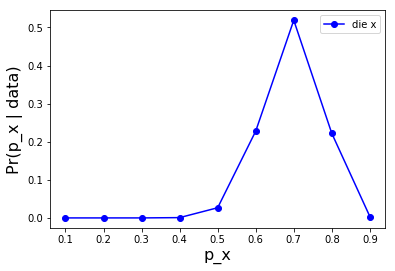

In [6]:
# SOLUTION

pvec = np.arange(0.1,1,0.1)
priorx = np.ones(9)/np.sum(np.ones(9))
likelihoodx = np.zeros(len(pvec))
for idx,p in enumerate(pvec):
    likelihoodx[idx] = p**hx * (1-p)**(nx-hx)
postxx = likelihoodx*priorx/np.sum(likelihoodx*priorx)

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(pvec,postxx,'bo-',label='die x')
ax.set_xlabel('p_x',FontSize=16)
ax.set_ylabel('Pr(p_x | data)',FontSize=16)
ax.legend()

**Part C:**

You learn that, actually, the coin $y$ is from a different manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $y$ coin is in the set $$p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with different probability. In particular, the probability that a coin has bias $p_y$ is proportional to $p_y$, which could be written as 
$$Pr(p_y) \propto p_y \quad \text{for} \quad p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}$$

First, write clearly the PMF for $p_y$, based on the information above. 

Then, for each possible value of $p_y$, compute the probability that Stella's $y$ coin has bias of $p_y$, given the data in her data file. 

Plot your results with $p_y$ on the horizontal axis and $Pr(p_y \mid \text{data})$ on the vertical axis. Make the points or lines that you plot red. Plots without axis labels will receive zero credit.

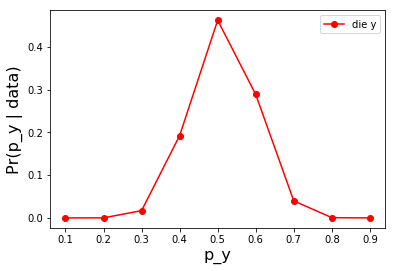

In [23]:
# SOLUTION

pvec = np.arange(0.1,1,0.1)
priory = pvec/np.sum(pvec)
likelihoody = np.zeros(len(pvec))
for idx,p in enumerate(pvec):
    likelihoody[idx] = p**hy * (1-p)**(ny-hy)
postyy = likelihoody*priory/np.sum(likelihoody*priory)

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(pvec,postyy,'ro-',label='die y')
ax.set_xlabel('p_y',FontSize=16)
ax.set_ylabel('Pr(p_y | data)',FontSize=16)
ax.legend()

**Part D:**

The information that you have about the manufacturer of coin $x$ and coin $y$ is called _prior information_ since it can influence the estimates of a coin's bias at which you arrive, given the data from the coin's flipping. We often call the distribution $Pr(p_x)$ or $Pr(p_y)$ a _prior distribution_, and call $Pr(p_x \mid \text{data})$ or $Pr(p_y \mid \text{data})$ a _posterior distribution_, since it represents the estimate that you arrive at after you have taken the data into account. 

You have already computed posterior distributions for each coin's bias. However, you'll now investigate the importance of the prior by _switching the priors for the two coins_.

In other words, using the prior probabilities $Pr(p_x)$, what is your posterior distribution of $Pr(p_y \mid \text{data from y})$? Similarly, using the prior probabilities $Pr(p_y)$, what is your posterior distribution of $Pr(p_x \mid \text{data from x})$? 

Create two plots. 

1. In the first plot, show your results from Part B (the posterior distribution for $p_x$ with the correct prior) plotted with a blue solid line as well as your results from Part D for the posterior distribution for $p_x$ with the incorrect prior with a blue dashed line.  

2. In the second plot, show your results from Part C (the posterior distribution for $p_y$ with the correct prior) with a red solid line as well as your results from Part D for the posterior distribution for $p_y$ with the incorrect prior with a red dashed line.  

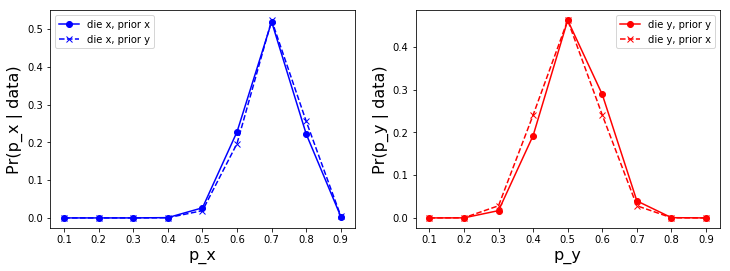

In [24]:
# SOLUTION

postxy = likelihoodx*priory/np.sum(likelihoodx*priory)
postyx = likelihoody*priorx/np.sum(likelihoody*priorx)

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(pvec,postxx,'bo-',label='die x, prior x')
ax[0].plot(pvec,postxy,'bx--',label='die x, prior y')
ax[0].set_xlabel('p_x',FontSize=16)
ax[0].set_ylabel('Pr(p_x | data)',FontSize=16)
ax[0].legend()
ax[1].plot(pvec,postyy,'ro-',label='die y, prior y')
ax[1].plot(pvec,postyx,'rx--',label='die y, prior x')
ax[1].set_xlabel('p_y',FontSize=16)
ax[1].set_ylabel('Pr(p_y | data)',FontSize=16)
ax[1].legend()

**Part E:**

What is the name of the distribution that Stella's experiment is drawn from?

**Solution**. It's a negative binomial.

<br>

---
[Back to Problem 2](#p2)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...